# Learning outcomes
1. Load, display and save images
2. Load, show and save videos
3. image resizing

## Why OpenCV?
- Compatible with multiple major OS, like Windows, MacOS, Linux, Written in C++, Python and Java
- Interpreterable with Numpy, thereby facilities fast computation of image arrays
- Large community support, a lot of articles, stackoverflow post regarding OpenCV

## Image formats
- JPEG(.jpg, .jpeg, jfif)
    - photos, smaller file size compared to png 
- PNG (.png)
    - website or file transfer
- tiff (.tif)
    - used for printing (high quality). Large file sixze
- bitmap(.bmp)
    - large file size
- gif (.GIF, OpenCV can't deal with GIF)
    - support animation, shallow color depth
- webp (.webp)
    - used for file transfer, not supported by IE


## Load and show images 

### setup

In [1]:
import sys
#at least Python 3.7
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv

In [2]:
print(cv.__version__)

4.8.0


In [3]:
img = cv.imread("images/lena.jfif")
grayscale = cv.imread("images/lena.jfif", 0)
# second argument: 1(default, read color image), 0(grayscale), -1: cv.CV

cv.imshow("lena_color", img)
cv.imshow("lena_grayscale", grayscale)
cv.waitKey(0) # key binding function: wait for user input
cv.destroyAllWindows()

In [2]:
def show_img(window_name, img):
    #2 arguments: window name and image***
    cv.imshow(window_name, img)
    cv.waitKey(0) # key binding function: wait for user input
    cv.destroyAllWindows()

In [5]:
img = cv.imread("images/lena.png")

show_img("image", img)


How about GIF? we need external module

In [3]:
import imageio

In [7]:
# GIF
GIF = imageio.mimread("images/rotating_earth_large.gif")

#convert RGB to BGR 
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in GIF]

for img in imgs:
    cv.imshow("GIF", img)
    cv.waitKey(150)
    
cv.destroyAllWindows()
        
#show_img("GIF", imgs[0])

In [8]:
img_jpeg = cv.imread("images/lena.jpg", -1)


# Save Image

    cv.imwrite(filepath, img)

In [ ]:
# formalized way to load, show, and save shape
img = cv.imread(cv.samples.findFile("images/lena.jfif"))

if img is None:
    sys.exit("Not a valid filepath")

cv.imshow("lena", img)
k = cv.waitKey(0) & 0xFF


#if k == 115:
if k == ord('s'): #user have to press 's'
    cv.imwrite("lena_save.jpg", img)
    
cv.destroyAllWindows()    

# video operations with OpenCV

In [18]:
cap = cv.VideoCapture("videos/img_pexels.mp4")
#object

if not cap.isOpened():
    sys.exit("No such file")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
    
while True:
    #first output in boolean
    #ret is status
    #frame is range
    ret, frame = cap.read()
    if not ret:
        print("No frame detected")
        break
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    
    if k == 27:
        break
        
cap.release()
cv.destroyAllWindows

No frame detected


<function destroyAllWindows>

In [19]:
img_jpeg = cv.imread("images/lena.jpg", -1)
img_png = cv.imread("images/lena.png", -1)

print(f"The shape of jpeg: {img_jpeg.shape}")
print(f"The shape of png: {img_png.shape}")

AttributeError: 'NoneType' object has no attribute 'shape'

# WebCam
save video captured by webcam

In [20]:
cap = cv.VideoCapture(0)

if not cap.isOpened():
    sys.exit("No webcam")

#parameters filepath, fourcc, fps, frame, width and height
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 15
w, h = int(cap.get(3)), int(cap.get(4))
out = cv.VideoWriter("videos/out.avi", fourcc, fps, (w,h))

while True:
    #ret is status
    #frame is range
    ret, frame = cap.read()
    if not ret:
        print("No frame detected")
        break
        
    out.write(frame)
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    
    if k == 27:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()

In [4]:
import time

cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No such file")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
    
start = time.time()    
while True:
    #ret is status
    #frame is range
    ret, frame = cap.read()
    if not ret:
        print("No frame detected")
        break
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    
    if k == 27:
        break
    
end = time.time()    
# cap.release()
cv.destroyAllWindows

No frame detected


<function destroyAllWindows>

In [22]:
print(f"The fps using the media player: {cap.get(5)}")
total_frame = cap.get(7)
print(f"The fps with OpenCV: {total_frame / (end - start)}")

The fps using the media player: 60.0
The fps with OpenCV: 719.8641236910252


## resizing

3 methods to perform resizing

1. set arbitrary sizes
2. state factor

In [ ]:
# 1 method: set any dimension you prefer
img = cv.imread("images/soccer.jpg")

# arguments: source image, dimension, fx, fy, interpolation methods
new_height = 300
new_width = 450
img_resize = cv.resize(img, (new_width, new_height))

cv.imshow("original", img)
show_img("resize", img_resize)

In [ ]:
#aspect ratio = width/ height
#800/1200 = 2/3 original aspect ratio
#300/ 450 = 2/3 resize image aspect ratio
img.shape

In [ ]:
#2 way: scale factor

img = cv.imread("images/lena.jfif")

img_resize = cv.resize(img, None, fx=1.5, fy=1.5)

cv.imshow("original", img)
show_img("resize", img_resize)

# Question 1

In [5]:
dog = cv.imread("images/dog.jfif")

show_img("dog", dog)



In [6]:
# formalized way to load, show, and save shape
img = cv.imread(cv.samples.findFile("images/dog.jfif"))

if img is None:
    sys.exit("Not a valid filepath")

cv.imshow("dog", img)
k = cv.waitKey(0) & 0xFF


#if k == 115:
if k == ord('s'): #user have to press 's'
    cv.imwrite("dog_save.jpg", img)
    
cv.destroyAllWindows() 

# Question 2

In [7]:
## 1 method call cv.imshow() twice

img = cv.imread("images/lena.jfif")
grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("COLOR", img)
show_img("grayscale", grayscale)

In [8]:
## 2 method call matplotlib module
import matplotlib.pyplot as plt

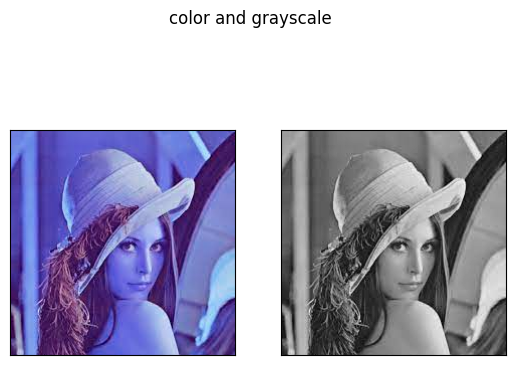

In [9]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(grayscale, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle("color and grayscale")
plt.show()

In [10]:
# 3 method: cv.imshow() or plt

grayscale = cv.cvtColor(grayscale, cv.COLOR_GRAY2BGR)

img_combined = np.hstack((img, grayscale))

show_img("color vs grayscale", img_combined)

# Question 3

In [18]:
# cap = cv.VideoCapture("videos/img_pexels.mp4")

# Define the desired frame size
desired_frame_width = 320
desired_frame_height = 240

# Define the desired frame rate (in milliseconds)
frame_rate = 30

while True:
    # Read the current frame from the video
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if not ret:
        break

    # Resize the frame
    resized_frame = cv.resize(frame, (desired_frame_width, desired_frame_height))

    # Display the resized frame
    cv.imshow("Resized Video", resized_frame)

    # Wait for the specified frame rate and check if the user wants to exit
    if cv.waitKey(frame_rate) & 0xFF == ord('q'):
        break

# Release the video capture object and close the display window
cap.release()
cv.destroyAllWindows()




In [17]:
#Save into seperate files
import cv2

# Open the video file
video_path = "img_pexels.mp4"
video_capture = cv2.VideoCapture(video_path)

# Define the desired frame size
desired_frame_width = 320
desired_frame_height = 240

# Define the desired frame rate (in milliseconds)
frame_rate = 30

# Define the output video file name and codec
output_file = "smaller_img_pexels.avi"
output_codec = cv2.VideoWriter_fourcc(*"MJPG")

# Create a VideoWriter object to save the resized video
output_video = cv2.VideoWriter(output_file, output_codec, frame_rate, (desired_frame_width, desired_frame_height))

while True:
    # Read the current frame from the video
    ret, frame = video_capture.read()

    # Check if the frame was successfully read
    if not ret:
        break

    # Resize the frame
    resized_frame = cv2.resize(frame, (desired_frame_width, desired_frame_height))

    # Display the resized frame
    cv2.imshow("Resized Video", resized_frame)

    # Write the resized frame to the output video file
    output_video.write(resized_frame)

    # Wait for the specified frame rate and check if the user wants to exit
    if cv2.waitKey(frame_rate) & 0xFF == ord('q'):
        break

# Release the video capture and video writer objects
video_capture.release()
output_video.release()

# Close the display window
cv2.destroyAllWindows()


In [20]:
# Question 4
from PIL import Image

# Open the original image
image_path = "images/dog.jfif"
original_image = Image.open(image_path)

# Define the desired enlargement factor
enlargement_factor = 2

# Perform linear interpolation
linear_resized_image = original_image.resize((original_image.width * enlargement_factor,
                                              original_image.height * enlargement_factor),
                                             Image.BILINEAR)
linear_resized_image.save("linear_enlarged_dog.jfif")

# Perform cubic interpolation
cubic_resized_image = original_image.resize((original_image.width * enlargement_factor,
                                             original_image.height * enlargement_factor),
                                            Image.BICUBIC)
cubic_resized_image.save("cubic_enlarged_dog.jfif")

# Perform nearest neighbor interpolation
nn_resized_image = original_image.resize((original_image.width * enlargement_factor,
                                          original_image.height * enlargement_factor),
                                         Image.NEAREST)
nn_resized_image.save("nn_enlarged_dog.jfif")


Linear interpolation (Image.BILINEAR) produces smoother results compared to the other techniques but may result in slightly blurred details.

Cubic interpolation (Image.BICUBIC) produces sharper results with more pronounced details, but it may introduce some artifacts or "halo" effects around edges.

Nearest neighbor interpolation (Image.NEAREST) preserves sharpness but may result in pixelated or blocky appearances, especially for images with complex patterns or fine details.